In [ ]:
import random
import zlib
import numpy as np
from multiprocessing import Pool, cpu_count
from collections import Counter

# Brainfuck-inspired instructions
INSTRUCTIONS = ['<', '>', '+', '-', '.', '[', ']']
TAPE_LENGTH = 64
SOUP_SIZE = 1024
MUTATION_RATE = 0.01
MAX_STEPS = 10000


def generate_random_tape(length=TAPE_LENGTH):
    """Generate a random tape of given length."""
    return [random.choice(INSTRUCTIONS + [None]) for _ in range(length)]


def mutate_tape(tape, rate=MUTATION_RATE):
    """Introduce mutations into a tape."""
    return [
        random.choice(INSTRUCTIONS + [None]) if random.random() < rate else x
        for x in tape
    ]


def execute_tape(tape, max_steps=MAX_STEPS):
    """Execute a Brainfuck-inspired tape."""
    data = [0] * TAPE_LENGTH
    dp = 0
    operations = 0

    for _ in range(max_steps):
        if operations >= len(tape):
            break
        cmd = tape[operations]
        if cmd == '>':
            dp = (dp + 1) % TAPE_LENGTH
        elif cmd == '<':
            dp = (dp - 1) % TAPE_LENGTH
        elif cmd == '+':
            data[dp] = (data[dp] + 1) % 256
        elif cmd == '-':
            data[dp] = (data[dp] - 1) % 256
        elif cmd == '.':
            pass  # Output (ignored for simplicity)
        elif cmd == '[' and data[dp] == 0:
            # Skip to matching ]
            depth = 1
            while depth > 0 and operations + 1 < len(tape):
                operations += 1
                if tape[operations] == '[':
                    depth += 1
                elif tape[operations] == ']':
                    depth -= 1
        elif cmd == ']' and data[dp] != 0:
            # Return to matching [
            depth = 1
            while depth > 0 and operations - 1 >= 0:
                operations -= 1
                if tape[operations] == ']':
                    depth += 1
                elif tape[operations] == '[':
                    depth -= 1
        operations += 1
    return data


def interaction(pair):
    """Simulate interaction between two tapes."""
    tape1, tape2 = pair
    combined_tape = tape1 + tape2
    output = execute_tape(combined_tape)
    return output


def compressibility(soup):
    """Calculate compressibility of the soup."""
    soup_bytes = ''.join([str(item) for tape in soup for item in tape if item]).encode()
    compressed_size = len(zlib.compress(soup_bytes))
    return compressed_size / len(soup_bytes) if soup_bytes else 1.0


def simulation_step(soup):
    """Perform one step of the simulation."""
    new_soup = []
    for _ in range(len(soup)):
        t1, t2 = random.sample(soup, 2)
        result = interaction((t1, t2))
        new_tape = mutate_tape(result)
        new_soup.append(new_tape)
    return new_soup


def simulate(soup, steps=100):
    """Run the full simulation."""
    compressibility_metrics = []
    operations_metrics = []

    for step in range(steps):
        soup = simulation_step(soup)
        comp = compressibility(soup)
        compressibility_metrics.append(comp)
        operations_metrics.append(sum(len(tape) for tape in soup))

    return compressibility_metrics, operations_metrics


if __name__ == "__main__":
    # Initialize random soup
    initial_soup = [generate_random_tape() for _ in range(SOUP_SIZE)]

    # Run simulation with multiprocessing
    with Pool(cpu_count()) as pool:
        results = pool.map(simulate, [initial_soup] * cpu_count())

    # Combine and analyze results
    avg_compressibility = np.mean([res[0] for res in results], axis=0)
    avg_operations = np.mean([res[1] for res in results], axis=0)

    # Plot results
    import matplotlib.pyplot as plt

    plt.figure()
    plt.plot(avg_compressibility, label="Compressibility")
    plt.title("Compressibility Over Time")
    plt.xlabel("Steps")
    plt.ylabel("Compressibility")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(avg_operations, label="Operations per Step")
    plt.title("Operations Over Time")
    plt.xlabel("Steps")
    plt.ylabel("Operations")
    plt.legend()
    plt.show()


In [ ]:
operation_counts = run_simulation()


NameError: name 'randint' is not defined

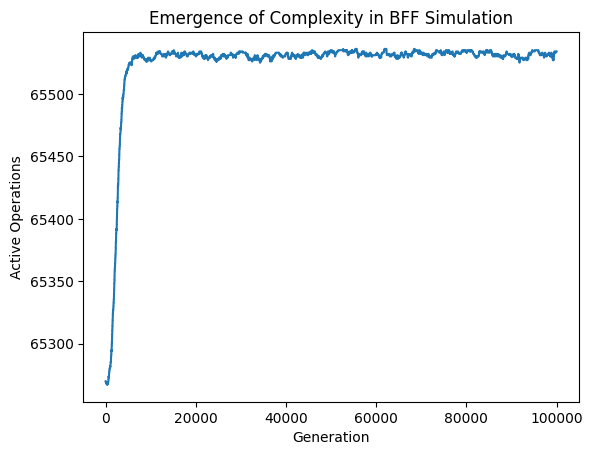

In [ ]:
import matplotlib.pyplot as plt

# Run the simulation
operation_counts, complexity_ratios = run_simulation()

# Plot activity
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(operation_counts)
plt.xlabel("Generation")
plt.ylabel("Active Operations")
plt.title("Active Operations Over Generations")

# Plot Kolmogorov complexity
plt.subplot(1, 2, 2)
plt.plot(complexity_ratios)
plt.xlabel("Generation")
plt.ylabel("Compression Ratio")
plt.title("Kolmogorov Complexity (Compression Ratio) Over Generations")

plt.tight_layout()
plt.show()


In [ ]:
population = initialize_population()

In [ ]:
len(population)

1024

In [ ]:
random.sample(range(POPULATION_SIZE), 2)

[326, 584]